In [81]:
import numpy as np

def find_equilibrium(G, q, mode='all one', tol=1e-5, max_iter=1000):
    n = len(q)  # Number of agents
    x = np.zeros(n)  # Initial actions
    
    if mode == 'all one':
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum(G[i, :] * x)
                x_new[i] = max(0, q[i] - sum_gx)
            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all two':
        G2 = np.linalg.matrix_power(G, 2)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two unaware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            x_old = np.zeros(n)
            
            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)
            # Calculate x_old of unaware agents
            sum_g1x_old = np.sum(G[0, :] * x)
            x_old[0] = max(0, q[0] - sum_g1x_old)

            # Update x2 using G
            sum_g2x = G[1, 0] * x_old[0] + G[1, 2] * x[2]
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = G[2, 0] * x_old[0] + G[2, 1] * x[1]
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two aware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            
            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            # Update x2 using G
            sum_g2x = np.sum((G[0, :]) * x)
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = np.sum((G[0, :]) * x)
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                # print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all three':
        G2 = np.linalg.matrix_power(G, 2)
        G3 = np.linalg.matrix_power(G, 3)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :] + G3[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new


    print("Max iterations reached without convergence.")
    return x

# Example adjacency matrix and q vector
G = np.array([[0, 0.1, 0.2],
              [0.1, 0, 0.5],
              [0.2, 0.5, 0]])

# generate G matrix
# G = np.random.rand(4, 4)

# q vector
q = np.ones(len(G)) 

# Testing all modes
print("Equilibrium actions for 'all one':")
equilibrium_all_one = find_equilibrium(G, q, mode='all one')
print(equilibrium_all_one)

print("\nEquilibrium actions for 'one two unaware':")
equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
print(equilibrium_one_two)

print("\nEquilibrium actions for 'one two aware':")
equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
print(equilibrium_one_two_aware)

print("\nEquilibrium actions for 'all two':")
equilibrium_all_two = find_equilibrium(G, q, mode='all two')
print(equilibrium_all_two)

print("\nEquilibrium actions for 'all three':")
equilibrium_all_three = find_equilibrium(G, q, mode='all three')
print(equilibrium_all_three)


Equilibrium actions for 'all one':
Converged in 23 iterations.
[0.83333458 0.66666897 0.50000248]

Equilibrium actions for 'one two unaware':
Converged in 17 iterations.
[0.70635014 0.66666692 0.50000158]

Equilibrium actions for 'one two aware':
[0.62270989 0.76923036 0.76923036]

Equilibrium actions for 'all two':
Converged in 133 iterations.
[0.75572904 0.49687888 0.42844702]

Equilibrium actions for 'all three':
Max iterations reached without convergence.
[0.46093842 0.         0.        ]


Converged in 23 iterations.
Converged in 17 iterations.
Converged in 133 iterations.


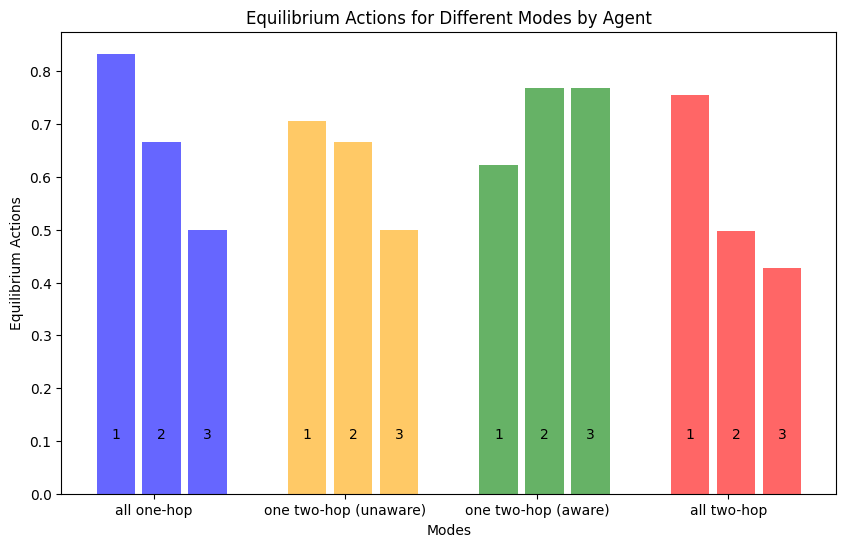

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the find_equilibrium function and G, q are defined elsewhere in your code
equilibrium_all_one = find_equilibrium(G, q, mode='all one')
equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
equilibrium_all_two = find_equilibrium(G, q, mode='all two')

# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the positions and width for the bars
bar_width = 0.2
x = np.arange(len(modes))

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Adding bars for each equilibrium mode
colors = ['blue', 'orange', 'green', 'red']
for i, (equilibrium, mode, color) in enumerate(zip(equilibrium_values, modes, colors)):
    for j, value in enumerate(equilibrium):
        plt.bar(x[i] + 1.2 * j * bar_width, value, bar_width, color=color, alpha=0.6, label=mode)
        plt.text(x[i] + 1.2 * j * bar_width, 0.1, str(j+1), ha='center', va='bottom')

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.xlabel('Modes')
plt.ylabel('Equilibrium Actions')
plt.xticks(x + bar_width, modes)

# Display the plot
plt.show()

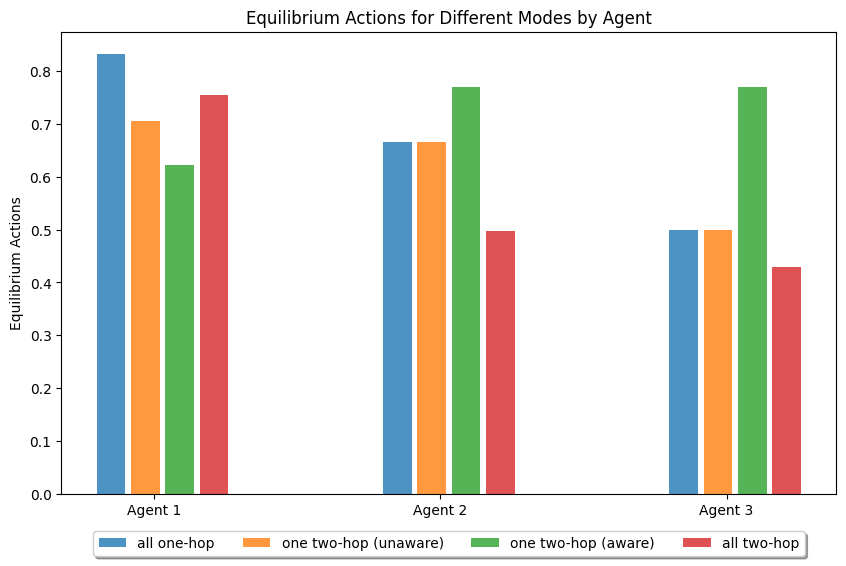

In [83]:
# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the positions and width for the bars
bar_width = 0.1
x = np.arange(len(agents))

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Adding bars for each mode
for i, (equilibrium, mode) in enumerate(zip(equilibrium_values, modes)):
    plt.bar(x + 1.2 * i * bar_width, equilibrium, bar_width, label=mode, alpha=0.8)

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x + bar_width * 1.5, agents)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)

# Display the plot
plt.show()

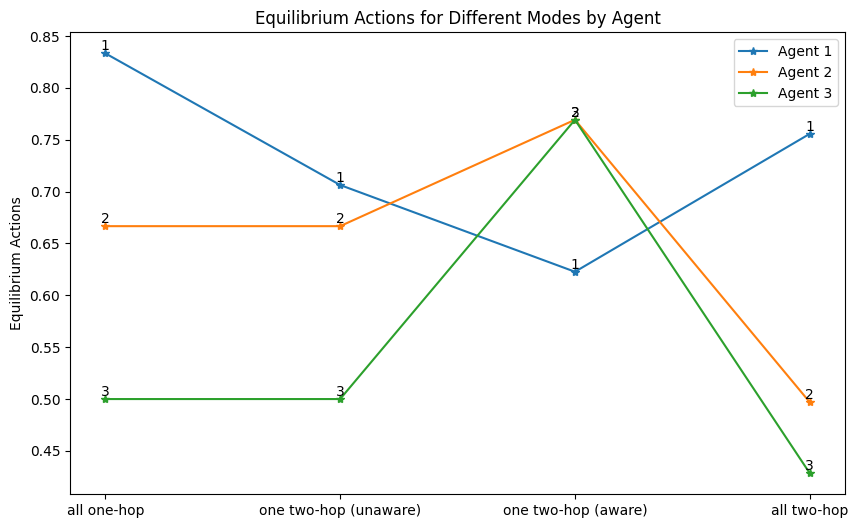

In [84]:
# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the x positions
x = np.arange(len(modes))

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Adding lines for each agent
for i, agent in enumerate(agents):
    plt.plot(x, equilibrium_values[:, i], marker='*', label=f'Agent {i+1}')
    for j, value in enumerate(equilibrium_values[:, i]):
        plt.text(x[j], value, str(i+1), ha='center', va='bottom')

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x, modes)
plt.legend()

# Display the plot
plt.show()